In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [17]:
api_key = 'd4fb6a15f7c7467e809f4a90db486743'
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2023-10-01 00:00:00'
end_date = '2023-10-30 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&interval={interval}&order={order}&start_date={start_date}&end_date={end_date}&apikey={api_key}'

In [18]:
data = requests.get(api_url).json()
data

{'meta': {'symbol': 'BTC/USD',
  'interval': '5min',
  'currency_base': 'Bitcoin',
  'currency_quote': 'US Dollar',
  'exchange': 'Coinbase Pro',
  'type': 'Digital Currency'},
 'values': [{'datetime': '2023-10-12 15:25:00',
   'open': '26678.58000',
   'high': '26682.35000',
   'low': '26643.03000',
   'close': '26644.31000'},
  {'datetime': '2023-10-12 15:30:00',
   'open': '26644.31000',
   'high': '26667.66000',
   'low': '26633.47000',
   'close': '26660.80000'},
  {'datetime': '2023-10-12 15:35:00',
   'open': '26660.80000',
   'high': '26679.26000',
   'low': '26658.03000',
   'close': '26675.89000'},
  {'datetime': '2023-10-12 15:40:00',
   'open': '26675.39000',
   'high': '26680.34000',
   'low': '26644.23000',
   'close': '26658.85000'},
  {'datetime': '2023-10-12 15:45:00',
   'open': '26658.85000',
   'high': '26673.60000',
   'low': '26608.47000',
   'close': '26619.35000'},
  {'datetime': '2023-10-12 15:50:00',
   'open': '26618.48000',
   'high': '26691.86000',
   'low'

In [19]:
df = pd.DataFrame(data['values'])
df.to_csv('btc.csv', index=False)

In [20]:
df.shape

(5000, 5)

In [21]:
df

,datetime,open,high,low,close
0,2023-10-12 15:25:00,26678.58000,26682.35000,26643.03000,26644.31000
1,2023-10-12 15:30:00,26644.31000,26667.66000,26633.47000,26660.80000
2,2023-10-12 15:35:00,26660.80000,26679.26000,26658.03000,26675.89000
3,2023-10-12 15:40:00,26675.39000,26680.34000,26644.23000,26658.85000
4,2023-10-12 15:45:00,26658.85000,26673.60000,26608.47000,26619.35000
...,...,...,...,...,...
4995,2023-10-29 23:40:00,34572.50000,34576.61000,34530.94000,34551.40000
4996,2023-10-29 23:45:00,34553.28000,34564.47000,34459.44000,34527.00000
4997,2023-10-29 23:50:00,34526.99000,34572.16000,34519.68000,34548.25000
4998,2023-10-29 23:55:00,34545.54000,34552.15000,34510.00000,34534.48000


In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [25]:
df['close'].values.reshape(-1,1)

array([['26644.31000'],
       ['26660.80000'],
       ['26675.89000'],
       ...,
       ['34548.25000'],
       ['34534.48000'],
       ['34559.52000']], dtype=object)

In [26]:
scaled_data

array([[0.01036805],
       [0.01230099],
       [0.01406983],
       ...,
       [0.93686218],
       [0.93524807],
       [0.93818324]])

In [27]:
time_intervals_to_train = 24
prediction_interval =12
x_train =[]
y_train = []


In [28]:
for i in range(time_intervals_to_train, len(scaled_data)-prediction_interval):
    x_train.append(scaled_data[i-time_intervals_to_train:i, 0])
    y_train.append(scaled_data[i+prediction_interval, 0])


In [32]:
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(4964, 24)


In [33]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1) , activation='relu') )
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25))
model.add(Dense(1))


In [44]:
model.compile(optimizer='adam', loss='mean_squared_error' , metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
4964/4964 [==============================] - 75s 14ms/step - loss: 0.0069 - accuracy: 2.0145e-04
Epoch 2/20
4964/4964 [==============================] - 62s 13ms/step - loss: 0.0049 - accuracy: 2.0145e-04
Epoch 3/20
4964/4964 [==============================] - 62s 12ms/step - loss: 0.0043 - accuracy: 2.0145e-04
Epoch 4/20
4964/4964 [==============================] - 71s 14ms/step - loss: 0.0041 - accuracy: 2.0145e-04
Epoch 5/20
4964/4964 [==============================] - 73s 15ms/step - loss: 0.0038 - accuracy: 2.0145e-04
Epoch 6/20
4964/4964 [==============================] - 60s 12ms/step - loss: 0.0037 - accuracy: 2.0145e-04
Epoch 7/20
4964/4964 [==============================] - 59s 12ms/step - loss: 0.0038 - accuracy: 2.0145e-04
Epoch 8/20
4964/4964 [==============================] - 62s 13ms/step - loss: 0.0036 - accuracy: 2.0145e-04
Epoch 9/20
4964/4964 [==============================] - 71s 14ms/step - loss: 0.0037 - accuracy: 2.0145e-04
Epoch 10/20
4964/4964 [=====

In [77]:
test_start = '2021-10-20 00:00:00'
test_end = '2021-10-23 00:00:00'
test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&interval={interval}&order={order}&start_date={test_start}&end_date={test_end}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_df = pd.DataFrame(test_data['values'])
test_df.to_csv('test_btc.csv', index=False)

In [80]:
test_df['close']
bitcoin_prices = pd.to_numeric(test_df['close'] , errors='coerce').values

In [84]:
test_inputs = test_df['close'].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs.size
model_inputs = scaler.fit_transform(test_inputs)

In [86]:
model_inputs.shape

(855, 1)

In [87]:
x_test = []
for x in range(time_intervals_to_train, len(model_inputs)):
    x_test.append(model_inputs[x-time_intervals_to_train:x, 0])

In [89]:
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [90]:
x_test.shape

(831, 24, 1)

In [93]:
prediction_prices = model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

26/26 [==============================] - 0s 12ms/step


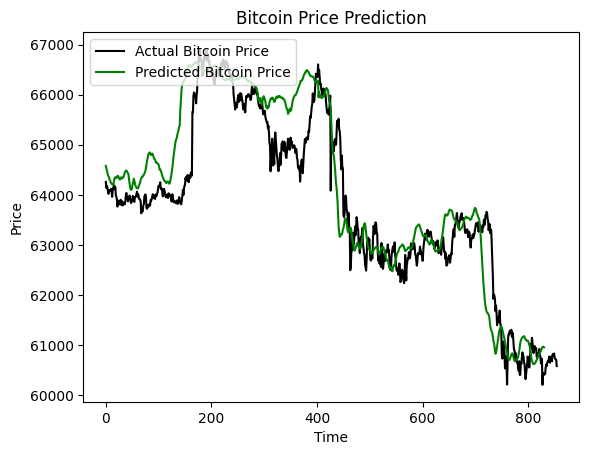

In [94]:
plt.plot(bitcoin_prices, color='black', label='Actual Bitcoin Price')
plt.plot(prediction_prices, color='green', label='Predicted Bitcoin Price')
plt.title(f'Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [96]:
last_data = model_inputs[len(model_inputs)+1 -time_intervals_to_train:len(model_inputs) +1, 0]
last_data=  np.array(last_data)

In [99]:
last_data.shape
last_data=np.reshape(last_data, (1,last_data.shape[0], 1))    

In [101]:
prediction=model.predict(last_data)
prediction=scaler.inverse_transform(prediction)

1/1 [==============================] - 0s 46ms/step


In [102]:
prediction

array([[60922.375]], dtype=float32)

In [ ]:
#calculate the accuracy of the model in percentage
